目的：datファイルやXMLファイルの構造をexploreする

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%cd /users/keimy/git/oct2age
%pwd

/Users/keimy/git/OCT2Age


'/Users/keimy/git/OCT2Age'

# check date of kenshin data

In [13]:
import pandas as pd

df2016 = pd.read_csv("data_kenshin/2016R2.csv", skiprows=0)
df2017 = pd.read_csv("data_kenshin/2017R2.csv", skiprows=0)
df2018 = pd.read_csv("data_kenshin/2018R2.csv", skiprows=0)
df_msp = pd.read_csv("/Users/keimy/git/oct2age/data_kenshin/msp.csv", skiprows=0)


# df2018から99999999を除外
df2018 = df2018[df2018.kenshindate != 99999999]
df2016.kenshindate.min(), df2018.kenshindate.max(), df_msp.date.min(), df_msp.date.max()


/var/folders/2q/37wkg3rj6hb2r8hl9r779vgw0000gn/T/ipykernel_6492/1350340717.py:3: DtypeWarning: Columns (86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,106,110,111,112,113,114,115,116,117,118,119,120,121,122,123,125,126,127,130,133,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,187,188,189,190,191,192,193,194,199,200) have mixed types. Specify dtype option on import or set low_memory=False.
  df2016 = pd.read_csv("data_kenshin/2016R2.csv", skiprows=0)
/var/folders/2q/37wkg3rj6hb2r8hl9r779vgw0000gn/T/ipykernel_6492/1350340717.py:4: DtypeWarning: Columns (177,178,187,188,189,190,191,192,193,194,199,200) have mixed types. Specify dtype option on import or set low_memory=False.
  df2017 = pd.read_csv("data_kenshin/2017R2.csv", skiprows=0)
/var/folders/2q/37wkg3rj6hb2r8hl9r779vgw0000gn/T/ipykernel_6492/1350340717.py:5: DtypeWarning: Columns (86,100,110,139,172,1

(20160401, 20190329, '2017/10/10', '2022/7/8')

# check XML

In [27]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

# XMLファイルの読み込み
file_path = "data_xml/00120141010_20141010_L_72_OCTAnalysisData.xml"
tree = ET.parse(file_path)
root = tree.getroot()

# すべてのユニークなタグを探索
unique_tags = set()
for elem in root.iter():
    unique_tags.add(elem.tag)

# タグごとにdataを抽出してprint
for tag in unique_tags:
    data = []
    for elem in root.findall(f'.//{tag}'):
        data.append(elem.text)
    print(tag, data)

DiscArea ['2.65', None, None, None, None, None]
MaculaEtdrsSectorTI [None, '75.56', '100.54', None, None, None]
CDLinearRatio ['0.00', None, None, None, None, None]
Disc12SectorSN ['151.48', None, None, None, None, None]
Macula6SectorAverage [None, '73.70', '106.40', None, None, None]
RNFL ['\n        ']
Disc12SectorTS ['100.76', None, None, None, None, None]
Macula6x6SuperiorThickness [None, None, None, None, None, None]
Disc6SectorTS [None, None, None, None, None, None]
Disc4SectorT ['80.08', None, None, None, None, None]
MaculaEtdrs6SectorNS [None, '71.67', '109.76', None, None, None]
Disc4SectorI ['148.15', None, None, None, None, None]
Disc12SectorN ['61.36', None, None, None, None, None]
MaculaEtdrsOuterN [None, None, None, '273.55', None, None]
Disc4SectorS ['148.06', None, None, None, None, None]
Disc6SectorNI [None, None, None, None, None, None]
MaculaEtdrsInnerT [None, None, None, '292.03', None, None]
Disc12SectorIN ['132.19', None, None, None, None, None]
Disc12SectorNS ['1

# check DAT

In [140]:
import struct

file_path = 'data_boundary/00120141010_20141010_L_72_BOUNDARY_BM.dat'

def read_boundary(file_path):
    # ファイルをバイナリモードで開く
    with open(file_path, 'rb') as file:
        data = file.read()

    # バイナリデータを16ビット整数のリストに変換
    # '<' はリトルエンディアン、'H' はunsigned short (16ビット整数) を意味します
    data_int = struct.unpack('<' + 'H' * (len(data) // 2), data)
    data_int = np.array(data_int).reshape(128, 512).T

    return data_int


prefix_per_patient = "data_boundary/00120141010_20141010_L_72_BOUNDARY"
BDY_ILM = read_boundary(prefix_per_patient+'_ILM.dat')
# RNFL
BDY_RNFLGCL = read_boundary(prefix_per_patient+'_RNFLGCL.dat')
# GCL
BDY_IPLINL = read_boundary(prefix_per_patient+'_IPLINL.dat')
# OUTER
# BDY_ISOS = read_boundary(prefix_per_patient+'_ISOS.dat')
# BDY_OSRPE = read_boundary(prefix_per_patient+'_OSRPE.dat')
BDY_BM = read_boundary(prefix_per_patient+'_BM.dat')

# 差分
RNFL = BDY_ILM - BDY_RNFLGCL
GCL = BDY_RNFLGCL - BDY_IPLINL
OUTER = BDY_IPLINL - BDY_BM


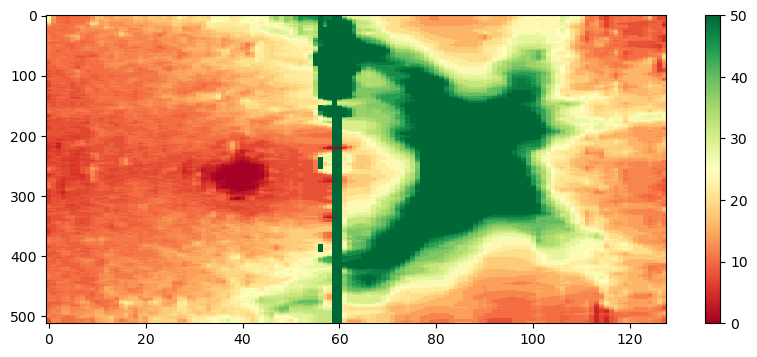

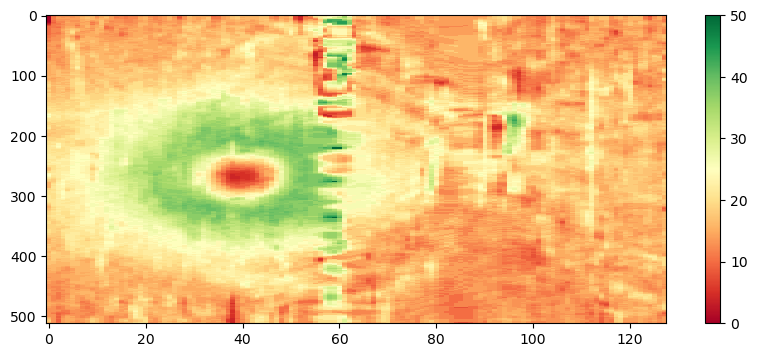

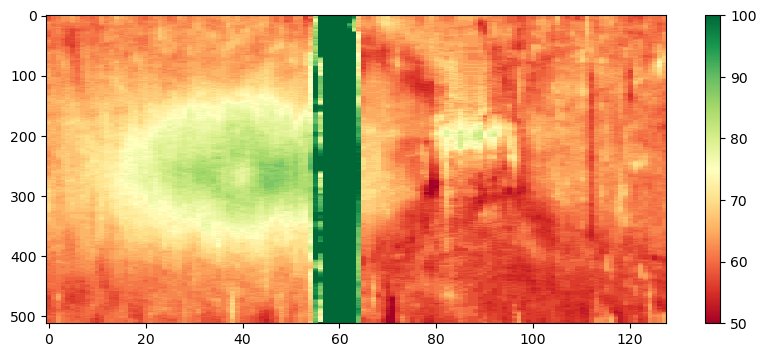

In [173]:
import matplotlib.pyplot as plt
import numpy as np

def draw_heatmap_with_scale(arr, vmin, vmax):
    """
    Draws a heatmap from a 2D array 'arr', considering its min and max values.
    Larger values are shown in green, and smaller values in red.
    """
    plt.figure(figsize=(10, 4))
    plt.imshow(arr, cmap='RdYlGn', aspect='auto', interpolation='nearest', vmin=vmin, vmax=vmax)
    plt.colorbar()
    plt.show()


# Drawing the heatmap
draw_heatmap_with_scale(RNFL, 0, 50)
draw_heatmap_with_scale(GCL, 0, 50)
draw_heatmap_with_scale(OUTER, 50, 100)


In [166]:
OUTER

array([[58, 61, 62, ..., 61, 62, 63],
       [58, 61, 62, ..., 61, 62, 63],
       [58, 61, 62, ..., 61, 60, 62],
       ...,
       [58, 59, 63, ..., 61, 62, 64],
       [59, 59, 63, ..., 61, 62, 64],
       [59, 59, 63, ..., 61, 62, 65]])

In [132]:
GCL

array([[ 0, 17, 17, ..., 17, 18, 16],
       [ 0, 18, 18, ..., 17, 17, 16],
       [ 0, 19, 18, ..., 17, 17, 16],
       ...,
       [19, 18, 18, ..., 17, 16, 14],
       [19, 17, 17, ..., 17, 16, 14],
       [18, 17, 17, ..., 17, 16, 13]])